In [460]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [461]:
# Reading Whales Returns 
whale_returns = pd.read_csv("whale_returns.csv",index_col='Date',parse_dates=True,infer_datetime_format=True)
whale_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [462]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [463]:
# Drop nulls
whale_returns_final = whale_returns.dropna()
whale_returns_final

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


### Algorithmic Daily Returns
Read the algorithmic daily returns and clean the data

In [464]:
# Reading algorithmic returns
algo_returns=pd.read_csv("algo_returns.csv",index_col='Date',parse_dates=True,infer_datetime_format=True)
algo_returns



,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [465]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [466]:
# Drop nulls
algo_returns_final = algo_returns.dropna()
algo_returns_final.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data.

In [467]:
# Reading S&P 500 Closing Prices
sp500_return=pd.read_csv("sp500_history.csv",index_col='Date',parse_dates=True,infer_datetime_format=True)
sp500_history.head()

,Daily_return
Date,
2019-04-23,NaN
2019-04-22,NaN
2019-04-18,-0.884637
2019-04-17,0.559400
2019-04-16,-2.445510


In [468]:
# Check Data Types
sp500_return.dtypes

Close    object
dtype: object

In [469]:
#Count nulls
sp500_return.isnull().sum()

Close    0
dtype: int64

In [470]:
#Drop nulls
sp500_return.dropna()
sp500_return.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [471]:
#Strip $ from close columns
sp500_return.Close=[x.strip('$')for x in sp500_return.Close]
sp500_return

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [472]:
# Change Coulmn name Close to Daily Return
sp500_return = pd.DataFrame(sp500_return)
sp500_return.rename(columns={"Close":"Daily_return"},inplace=True)
sp500_return

,Daily_return
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [473]:
# Fix Data Types
#Strip $ from return columns
sp500_return.Daily_return=[x.strip('$')for x in sp500_return.Daily_return]
sp500_return

,Daily_return
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [474]:
# Fix Data Types
sp500_return["Daily_return"] = sp500_return["Daily_return"].astype(float).pct_change()
sp500_return.head()

,Daily_return
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [475]:
## Combine Whale, Algorithmic, and S&P 500 Returns

In [476]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df= pd.concat([whale_returns_final,algo_returns_final,sp500_return], axis="columns" , join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily_return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

Performance Anlysis
Calculate and Plot the daily returns

<AxesSubplot:xlabel='Date'>

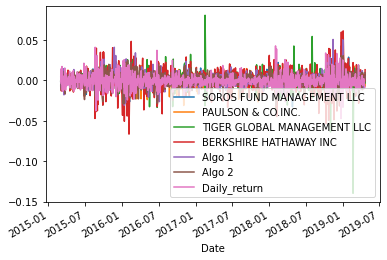

In [477]:
# Plot daily returns of all portfolios
combined_df.plot()

# Calculate and Plot cumulative returns

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-04-16                   1.160965            0.786811   
2019-04-17                   1.157602            0.781723   
2019-04-18                   1.159278            0.782678   
2019-04-22                   1.156280            0.776939   
2019-04-23                   1.164568            0.779646   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2019-04-16                     0.862080                1.526861  1.944990   
2019-04-17                     0.858279                1.531781  1.924954   
2019-04-18                     0.858778                1.534716  1.923823   
2019-04-22                     0.855652                1.533046  1.925124   
2019-04-23                     0.861189                1.553401  1.934691   

              Algo 2  Daily_retu

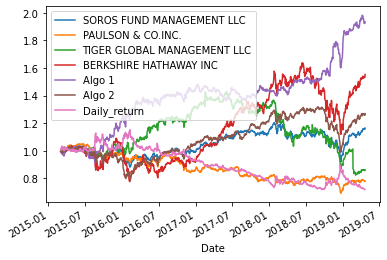

In [478]:
#Plot cumulative returns
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.plot()
print(cumulative_returns.tail())


## Risk Analysis

Determine the risk of each portfolio:

Create a box plot for each portfolio.

Calculate the standard deviation for all portfolios

Determine which portfolios are riskier than the S&P 500

Calculate the Annualized Standard Deviation

<AxesSubplot:>

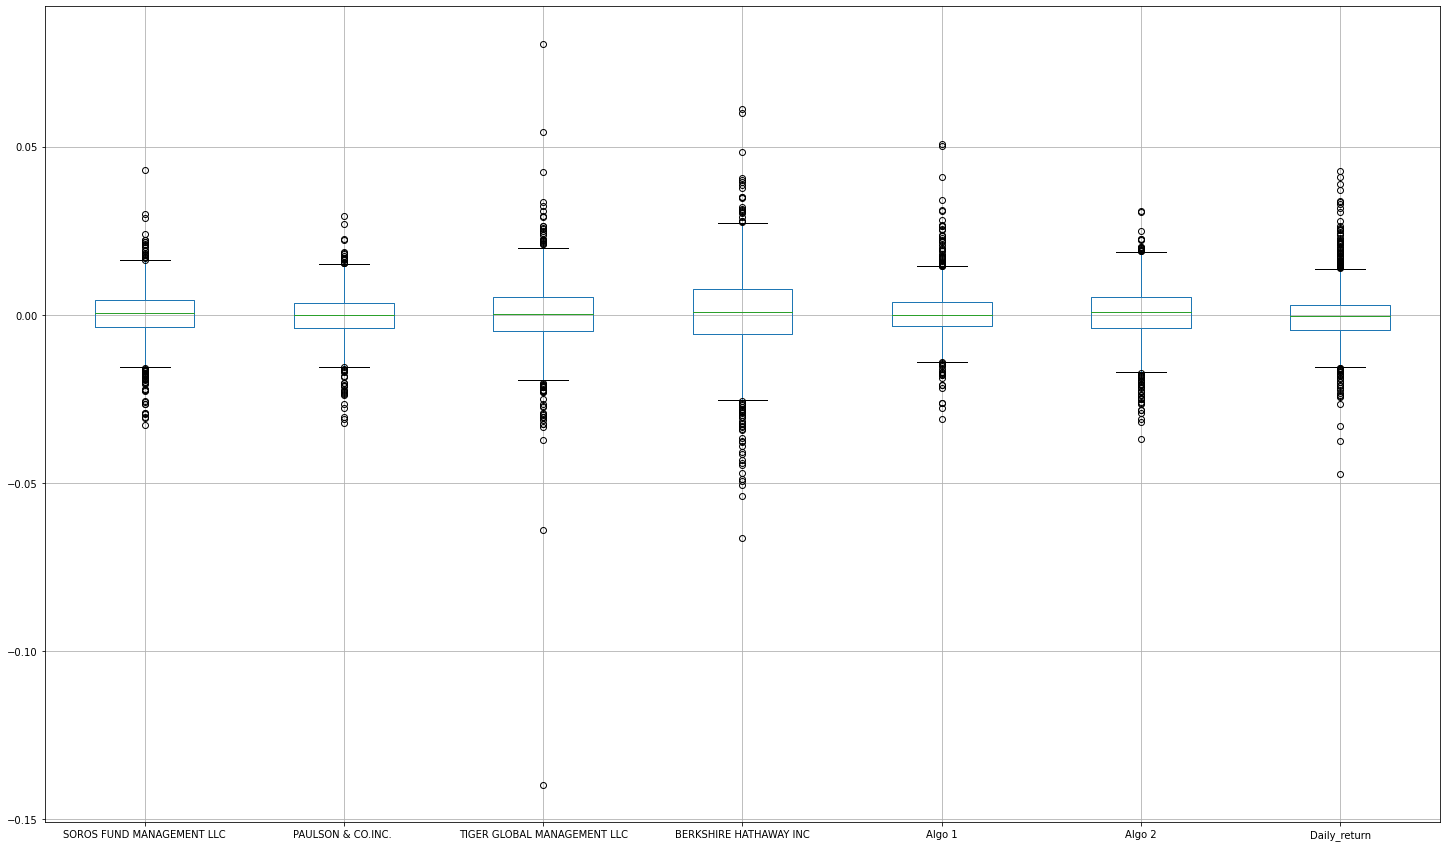

In [479]:
#create a box plot for each portfolio
combined_df.boxplot(figsize=(25,15))

In [480]:
#Standard deviation for every portfolio
combined_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
Daily_return                   0.008587
dtype: float64


### Determine which portfolios are riskier than the S&P 500
By Visual observation we can see that there are two Portfolios that are riskier than the S&P 500. Tiger Global Management(0.0109) and Berkshire Hathaway(0.0130) have higher
standard deviations than the S&P(0.009)

In [481]:
#Annualized Standard Deviation (squareroot of annualuzed variance)
annualized_variance = (combined_df.var()*252)
annualized_std = np.sqrt(annualized_variance)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
Daily_return                   0.136313
dtype: float64

## Rolling Statistics
Risk changes over time. Analyze the rolling statistics for Risk and Beta.

Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

<AxesSubplot:xlabel='Date'>

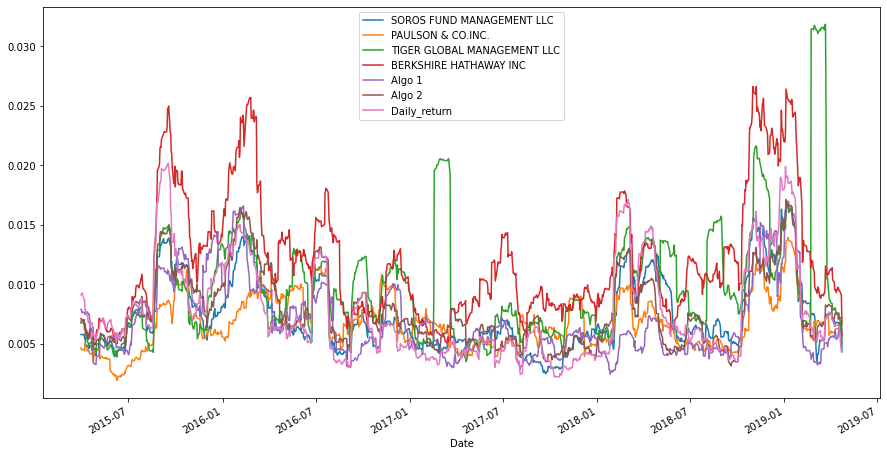

In [482]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std().plot(figsize=(15,8))

In [483]:
#Correlation
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily_return
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.000574
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,-0.001505
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,-0.013856
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,-0.033963
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,-0.002192
Daily_return,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:>

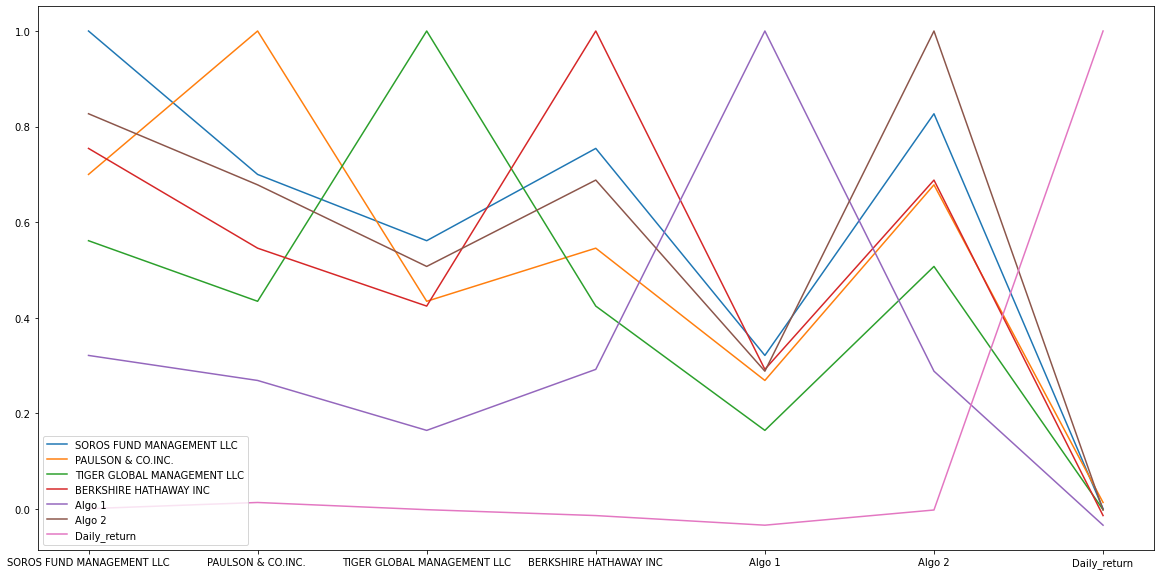

In [484]:
# Plot the rolling standard deviation
correlation.plot(figsize=(20,10)) 

## Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [485]:
# Calculate covariance of a single portfolio
#calculating Beta for Soros Fund management
covariance = combined_df['SOROS FUND MANAGEMENT LLC'].cov(combined_df['Daily_return'])
covariance

3.8897269830622025e-08

In [486]:
# Calculate variance of S&P 500
variance = combined_df['Daily_return'].var()
variance

7.373467552840441e-05

In [487]:
# Computing beta
Beta = covariance/variance
Beta

0.0005275302230853086

In [488]:
# Rolling variance
rolling_covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_df['Daily_return'])
rolling_variance = combined_df['Daily_return'].rolling(window=60).var()

<AxesSubplot:title={'center':'Rolling 60-Day SOROS MANAGEMENT LLC'}, xlabel='Date'>

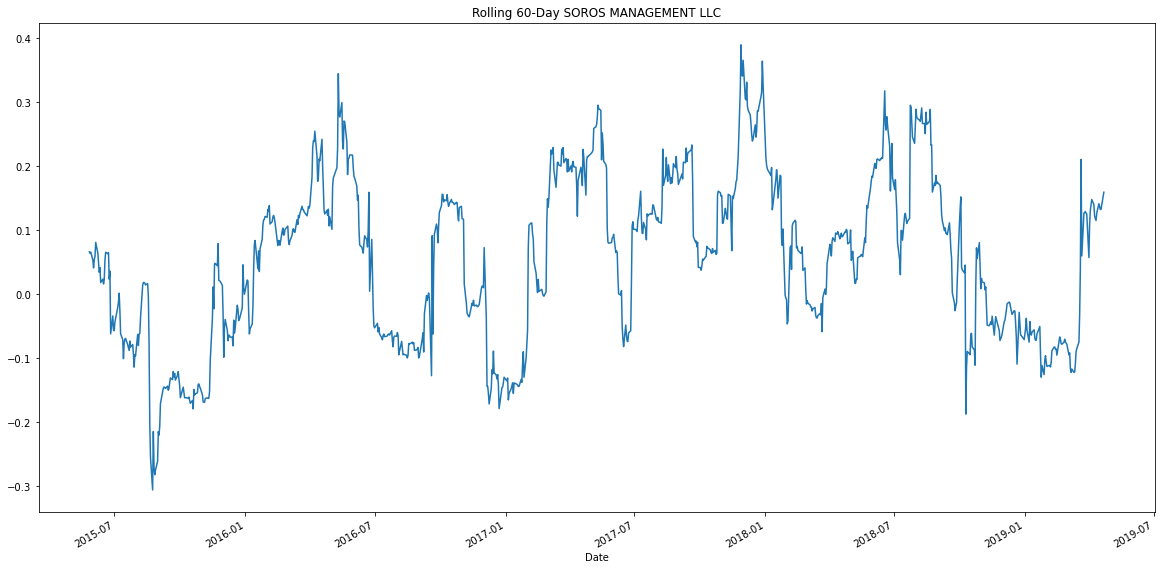

In [489]:
# Plot Variance Trendline
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day SOROS MANAGEMENT LLC')


Rolling Statistics Challenge: Exponentially Weighted Average
An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21-day half-life

<AxesSubplot:xlabel='Date'>

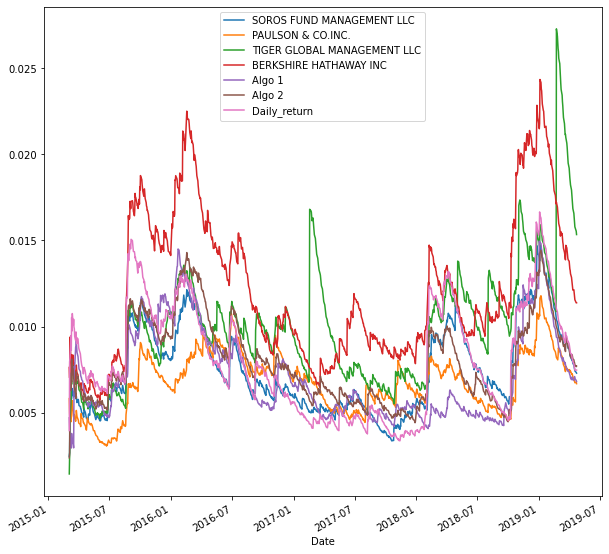

In [490]:
combined_df.ewm(halflife=21).std().plot(figsize=(10,10))



Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

In [491]:
# Annualized Sharpe Ratios

sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
Daily_return                  -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

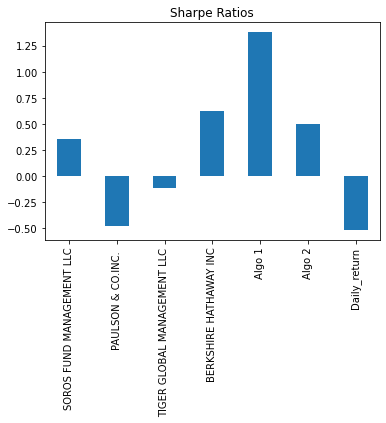

In [492]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

## Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.¶
### Answer) The algorithmic straregies(algo1) has outperformed both the s&p 500 and the whales portfolio.Algo1 has a sharp ratio of 1.25 compared to bekshire Hathway at .75 and the market at 0, thus making it a better investment. 

Create Custom Portfolio
In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500.

Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
Join your portfolio returns to the DataFrame that contains all of the portfolio returns
Re-run the performance and risk analysis with your portfolio to see how it compares to the others
Include correlation analysis to determine which stocks (if any) are correlated

In [493]:
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [494]:

# GOOG stock info
goog_csv = Path("goog_historical.csv")
goog_df = pd.read_csv(goog_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df.rename( columns={"Symbol": "GOOG1","NOCP":"GOOG"},inplace = True )
goog_df.drop(columns=['GOOG1'], axis=1, inplace = True)

In [495]:
#AAPL stock info
aapl_csv = ("aapl_historical.csv")
aapl_df = pd.read_csv(aapl_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.rename( columns={"Symbol": "AAPL1","NOCP":"AAPL"},inplace = True )
aapl_df.drop(columns=['AAPL1'], axis=1, inplace= True)

In [496]:
#COST stock info
cost_csv = ("cost_historical.csv")
cost_df = pd.read_csv(cost_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.rename( columns={"Symbol": "COST1","NOCP":"COST"},inplace = True )
cost_df.drop(columns=['COST1'], axis=1,inplace = True)

In [497]:
# combining Apple,Costco and Google
combined_df2 = pd.concat([goog_df,aapl_df,cost_df], axis='columns', join='inner')
combined_df2.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [498]:
#sort index
combined_df2.sort_index(inplace=True)
combined_df2.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [499]:
# Daily Returns for Combined Stocks
daily_returns = combined_df2.pct_change()
daily_returns.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479


### Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [500]:
# Calculating weight of each stock 
weights = [1/3, 1/3, 1/3]
portfolio_returns = daily_returns.dot(weights)

custom = pd.DataFrame(portfolio_returns)
custom.head()

,0
Trade DATE,
2018-05-11,NaN
2018-05-14,0.000015
2018-05-15,-0.010064
2018-05-16,0.009403
2018-05-17,-0.001595


In [501]:
# Combining Previous and current portfolios
combined_df3 = pd.concat([portfolio_returns, combined_df], axis='columns', join='inner')
combined_df3.rename(columns= {0: "Custom"},inplace = True )
combined_df3.dropna(inplace=True)
combined_df3.sort_index()
combined_df3.head()

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily_return
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333


Re-run the risk analysis with your portfolio to see how it compares to the others¶
Calculate the Annualized Standard Deviation

In [502]:
# Number of nulls
combined_df3.isnull().sum()

Custom                         0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
Daily_return                   0
dtype: int64

In [503]:
# Combined Standard deviation for all portfolios
combined_df3.std()

Custom                         0.013331
SOROS FUND MANAGEMENT LLC      0.009248
PAULSON & CO.INC.              0.007366
TIGER GLOBAL MANAGEMENT LLC    0.014671
BERKSHIRE HATHAWAY INC         0.015579
Algo 1                         0.008437
Algo 2                         0.008788
Daily_return                   0.009605
dtype: float64

In [504]:
# Calculate the annualized `std`
annualized_variance2= (combined_df3.var()*252)
annualized_std2=np.sqrt(annualized_variance2)
annualized_std2

Custom                         0.211627
SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
Daily_return                   0.152469
dtype: float64

            
Calculate and plot rolling std with 21-day window           

In [505]:
# Calculate rolling standard deviation
combined_df3.rolling(window=21).std()

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily_return
2018-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-04-15,0.007588,0.006804,0.006225,0.007525,0.009729,0.005496,0.007572,0.006532
2019-04-16,0.007507,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006571
2019-04-17,0.007668,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006505
2019-04-18,0.007482,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006137


<AxesSubplot:>

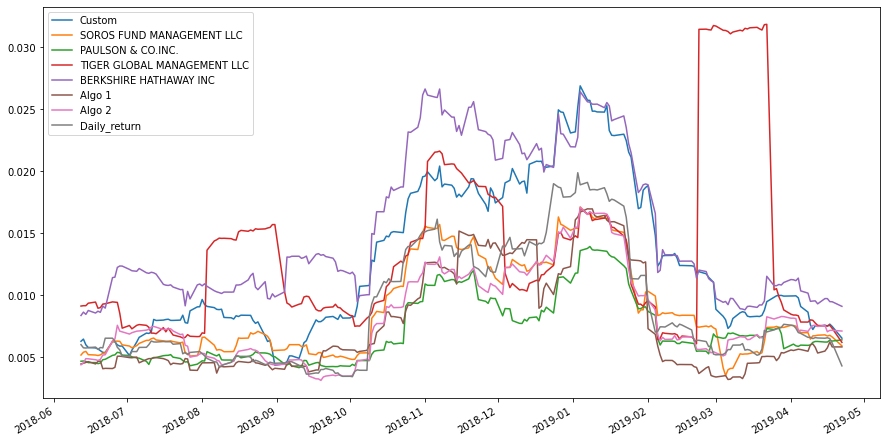

In [506]:
# Plot rolling standard deviation
combined_df3.rolling(window=21).std().plot(figsize=(15,8))

Calculate and plot the correlation

<AxesSubplot:>

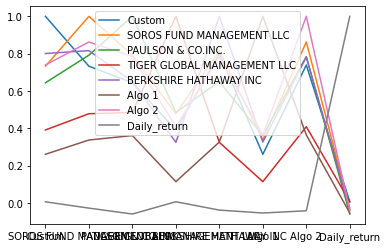

In [507]:
# Calculate and plot the correlation
correlation1= combined_df3.corr().plot()
correlation1

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Custom Beta'}>

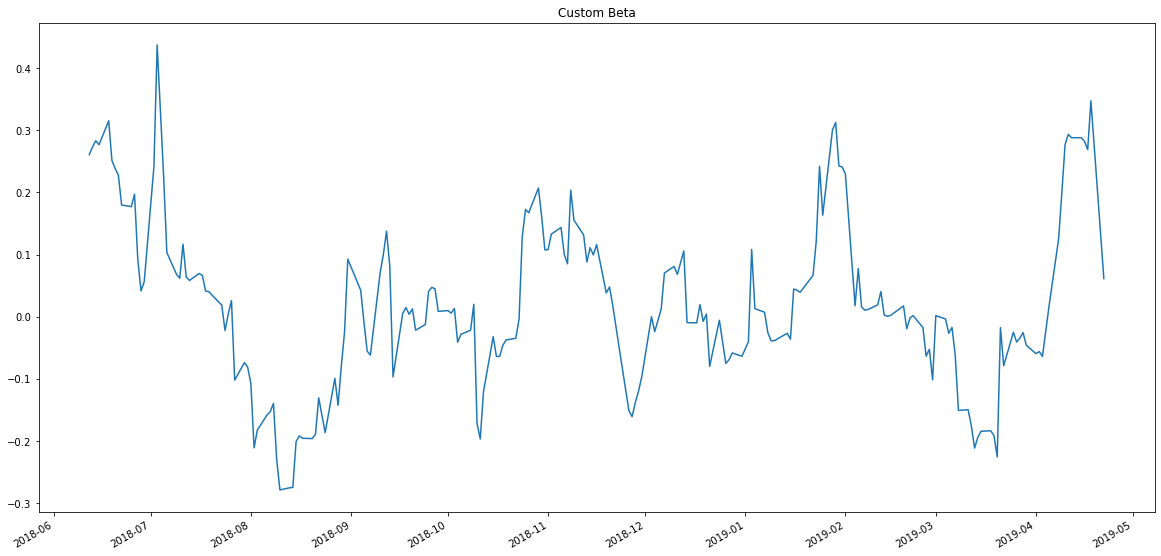

In [508]:
# Calculate and plot Beta
rolling_covariance1 = combined_df3['Custom'].rolling(window=21).cov(combined_df3['Daily_return'])
rolling_variance1 = combined_df3['Custom'].rolling(window=21).var()
rolling_beta1 = rolling_covariance1 / rolling_variance1
rolling_beta1.plot(figsize=(20, 10), title='Custom Beta')
              


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [511]:
#Annulaized Sharpe Ratios
sharpe_ratios_all = (combined_df3.mean() * 252) / ((combined_df3).std() * np.sqrt(252))
sharpe_ratios_all


Custom                         0.876152
SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
Daily_return                  -0.427676
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

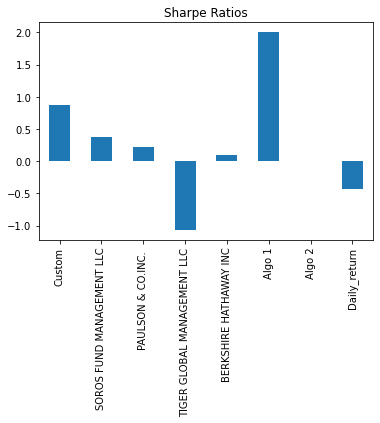

In [512]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_all.plot(kind="bar", title="Sharpe Ratios")


How does your portfolio do?

My portfolio did better than all of them except Algo1.